# Aprendizje supervisado - Problemas de clasificación con árboles

## Algoritmos basados en áborles para la clasificación

Este modelo es intresante para predecir los valore de un variable continua. Ya que los árboles de decisión pueden utilizarse tanto para problemas de clasificación como de refresión, en este documento estudiaremos soluciones de clasificación mediante árboles de decisión.

## Tipos de Algoritmos de Árboles de Decisión

- **ID3 o Iterative Dichotomizer 3** es un algoritmo de árbol de decisión que utiliza la búsqueda voraz para devidir el conjunto de datos en cada iteración.
- **CART** o árbol de clasificación y regresión es una solución flexible basada en árboles.
- **C4.5** es una extensión de ID3 y se utiliza para problemas de clasificación. Al igual que ID3, utiliza la entropía o la ganancia de información para realizar la división.
- **CHAID (Chi-square automatic interaction detection)** es un algoritmo popular en el campo de la investigación de mercados y el marketing.
- **MARS (Multivariate Adaptive Regression Splines)** o splines de regresión adaptativa multivariante es una técnica de regresión no paramétrica. Es especialmente adecuada para medir relaciones no lineales entre variables.

## Importción de bibliotecas

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Importar el conjunto de datos

In [36]:
dataset = pd.read_csv("data/arboles/bill_authentication.csv")

dataset.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


## Análisis de datos

In [37]:
dataset.shape

(1372, 5)

In [38]:
dataset.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [70]:
plt.bar(dataset.columns, dataset.Class)
plt.xlabel('Características')
plt.ylabel('Importancia')
plt.title('Importancia de las características')
plt.show()

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (5,) and arg 1 with shape (1372,).

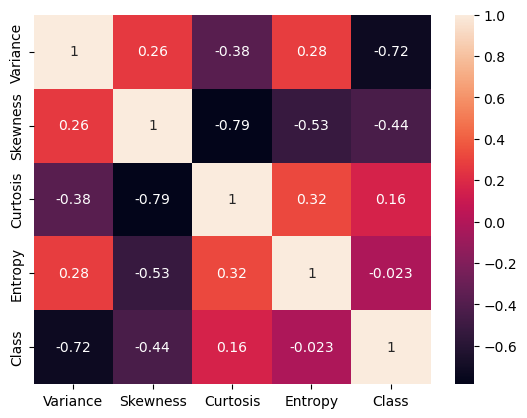

In [44]:
# Correlación

import seaborn as sns

sns.heatmap(dataset.corr(), annot=True)
plt.show()



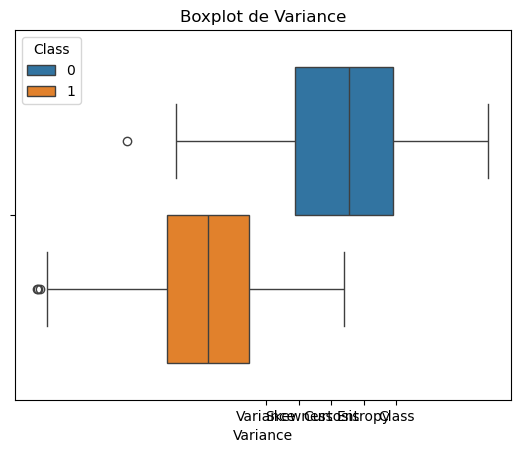

In [73]:
sns.boxplot(data=dataset, x="Variance", hue="Class")
plt.title("Boxplot de Variance")
plt.show()


## Preparación de los datos

In [6]:
X = dataset.drop("Class", axis=1)
y = dataset["Class"]

In [7]:
# Dividir el conjunto de datos en entrenamiento y prueba

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

## Entrenamiento y realización de predicciones

In [9]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

# Realizar predicciones
y_pred = classifier.predict(X_test)

## Evaluación del algoritmo

In [10]:
from sklearn.metrics import classification_report, confusion_matrix

print(f"Matriz de confusión:\n {confusion_matrix(y_test, y_pred)}")
print(f"Reporte de clasificación:\n {classification_report(y_test, y_pred)}")


Matriz de confusión:
 [[136   2]
 [  0 137]]
Reporte de clasificación:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       138
           1       0.99      1.00      0.99       137

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



# Árbol de decisión para regresión

## Importación de bibliotecas

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Importación del conjunto de datos

In [12]:
dataset = pd.read_csv("data/arboles/petrol_consumption.csv")

dataset.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


## Análisis de datos

In [13]:
dataset.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [14]:
dataset.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


## Preparación de datos

In [15]:
X = dataset.drop("Petrol_Consumption", axis=1)
y = dataset["Petrol_Consumption"]

# Dividir nuestros datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Entrenamiento y realización de predicciones

In [16]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = regressor.predict(X_test)

# Comparar valores predichos con valores reales
df = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})

df

,Actual,Predicted
29,534,547.0
4,410,414.0
26,577,574.0
30,571,554.0
32,577,554.0
37,704,554.0
34,487,628.0
40,587,540.0
7,467,414.0
10,580,464.0


## Evaluación del algoritmo

In [18]:
from sklearn import metrics

print(f"Mean Absolute Error: {metrics.mean_absolute_error(y_test, y_pred)}")
print(f"Mean Squared Error: {metrics.mean_squared_error(y_test, y_pred)}")
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(f"R2 Score: {metrics.r2_score(y_test, y_pred)}")


Mean Absolute Error: 56.7
Mean Squared Error: 6186.7
Root Mean Squared Error: 78.65557831457346
R2 Score: -0.05585175375121176


## Bosque aleatorio (Random Forest)

### Paso 1. - Separar las características y la etiqueta

In [19]:
import pandas as pd

df = pd.read_csv("data/arboles/possum.csv")

df.sample(6, random_state=44)

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
88,89,7,other,m,6.0,97.7,58.4,84.5,35.0,64.4,46.2,14.4,29.0,30.5
39,40,2,Vic,f,3.0,91.0,55.0,84.5,36.0,72.8,51.4,13.6,27.0,30.0
92,93,7,other,m,3.0,89.2,54.0,82.0,38.0,63.8,44.9,12.8,24.0,31.0
7,8,1,Vic,f,6.0,94.8,57.6,91.0,37.0,72.7,53.9,14.5,29.0,34.0
98,99,7,other,f,3.0,93.3,56.2,86.5,38.5,64.8,43.8,14.0,28.0,35.0
19,20,1,Vic,f,4.0,94.8,56.3,89.0,38.0,73.8,52.4,15.5,27.0,36.0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       104 non-null    object 
 3   sex       104 non-null    object 
 4   age       102 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  103 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB


In [21]:
df = df.dropna()

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      101 non-null    int64  
 1   site      101 non-null    int64  
 2   Pop       101 non-null    object 
 3   sex       101 non-null    object 
 4   age       101 non-null    float64
 5   hdlngth   101 non-null    float64
 6   skullw    101 non-null    float64
 7   totlngth  101 non-null    float64
 8   taill     101 non-null    float64
 9   footlgth  101 non-null    float64
 10  earconch  101 non-null    float64
 11  eye       101 non-null    float64
 12  chest     101 non-null    float64
 13  belly     101 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.8+ KB


In [23]:
X = df.drop(["case", "site", "Pop", "sex"], axis=1)

y = df["sex"]

### Paso 2 - Entrenamiento de nuestro modelo de bosque aleatorio

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=44)

from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=50, random_state=44)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=44)

### Paso 3 - Hacer predicciones con nuesto modelo

In [26]:
predictions = rf_model.predict(X_test)

predictions

array(['f', 'm', 'm', 'm', 'f', 'f', 'm', 'm', 'm', 'm', 'm', 'f', 'm',
       'm', 'm', 'm', 'm', 'f', 'm', 'm', 'm', 'f', 'f', 'm', 'm', 'm',
       'm', 'm', 'm', 'm', 'f'], dtype=object)

In [27]:
rf_model.predict_proba(X_test)

array([[0.5 , 0.5 ],
       [0.26, 0.74],
       [0.36, 0.64],
       [0.3 , 0.7 ],
       [0.66, 0.34],
       [0.54, 0.46],
       [0.48, 0.52],
       [0.42, 0.58],
       [0.18, 0.82],
       [0.34, 0.66],
       [0.48, 0.52],
       [0.54, 0.46],
       [0.4 , 0.6 ],
       [0.28, 0.72],
       [0.48, 0.52],
       [0.36, 0.64],
       [0.4 , 0.6 ],
       [0.54, 0.46],
       [0.44, 0.56],
       [0.06, 0.94],
       [0.32, 0.68],
       [0.56, 0.44],
       [0.66, 0.34],
       [0.46, 0.54],
       [0.18, 0.82],
       [0.46, 0.54],
       [0.34, 0.66],
       [0.26, 0.74],
       [0.2 , 0.8 ],
       [0.1 , 0.9 ],
       [0.5 , 0.5 ]])

In [28]:
rf_model.classes_

array(['f', 'm'], dtype=object)

In [29]:
rf_model.feature_importances_

array([0.05237143, 0.1461762 , 0.08878178, 0.11322144, 0.07150935,
       0.16099193, 0.11990223, 0.11082213, 0.05286153, 0.08336197])

In [33]:
importances = rf_model.feature_importances_
columns = X.columns
i = 0

while i < len(columns):
    print(f"La importancia de la característica {columns[i]} es {round(importances[i] * 100, 2)}%")
    i += 1

La importancia de la característica age es 5.24%
La importancia de la característica hdlngth es 14.62%
La importancia de la característica skullw es 8.88%
La importancia de la característica totlngth es 11.32%
La importancia de la característica taill es 7.15%
La importancia de la característica footlgth es 16.1%
La importancia de la característica earconch es 11.99%
La importancia de la característica eye es 11.08%
La importancia de la característica chest es 5.29%
La importancia de la característica belly es 8.34%


In [34]:
new_possum = [[7.0, 83.2, 54.3, 81.0, 37.0, 70.0, 46.3, 14.7, 25.0, 32.0]]

rf_model.predict(new_possum)


c:\Users\vicma\anaconda3\envs\ai_security\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array(['m'], dtype=object)

# Conclusión

De esta manera se crea un modelo de bosque aleatorio en Python con scikit-learn. Lo interesante de este modelo es que es mas facil de comprender y se utiliza con gran eficacia sin necesidad de ajuste complejos de hiperparametros.